In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import joblib
predictions = joblib.load('y_pred')
true_labels = joblib.load('y_test')
index2label = joblib.load('index2label')

In [16]:
def decode_labels(y_test=true_labels, y_preds=predictions, index2label=index2label):
    new_true = []
    new_preds = []
    for true, pred, i2l in zip(y_test, y_preds, index2label):
        for i in range(len(true)):
            t_label = i2l[true[i]]
            p_label = i2l[pred[i]]
            new_true.append(t_label)
            new_preds.append(p_label)
    return new_true, new_preds


In [17]:
y_test, y_preds = decode_labels()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

 CASE_NUMBER       1.00      0.94      0.97      1441
       COURT       0.96      0.94      0.95       789
        DATE       1.00      1.00      1.00      1053
         GPE       0.83      0.85      0.84       355
       JUDGE       0.90      0.95      0.93       285
           O       1.00      0.98      0.99     21139
         ORG       0.91      0.82      0.87       821
OTHER_PERSON       0.90      0.83      0.87       986
  PETITIONER       0.54      0.80      0.65       179
   PRECEDENT       0.88      1.00      0.93      2436
   PROVISION       0.99      0.98      0.98      1296
  RESPONDENT       0.83      0.81      0.82       102
     STATUTE       0.97      0.98      0.98      1278
     WITNESS       0.74      0.90      0.81       224

    accuracy                           0.97     32384
   macro avg       0.89      0.91      0.90     32384
weighted avg       0.97      0.97      0.97     32384



In [22]:
labels = ['OTHER_PERSON', 'GPE', 'PROVISION', 'WITNESS', 'O', 'RESPONDENT', 'DATE', 'COURT', 'CASE_NUMBER', 'JUDGE', 'STATUTE', 'PETITIONER', 'ORG', 'PRECEDENT']

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
cm = confusion_matrix(y_test, y_preds, labels=labels)

In [90]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds,normalize='true')
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="PuRd", values_format=".2f", ax=ax, colorbar=True, xticks_rotation='vertical')
  plt.title("Normalized confusion matrix")
  plt.show()

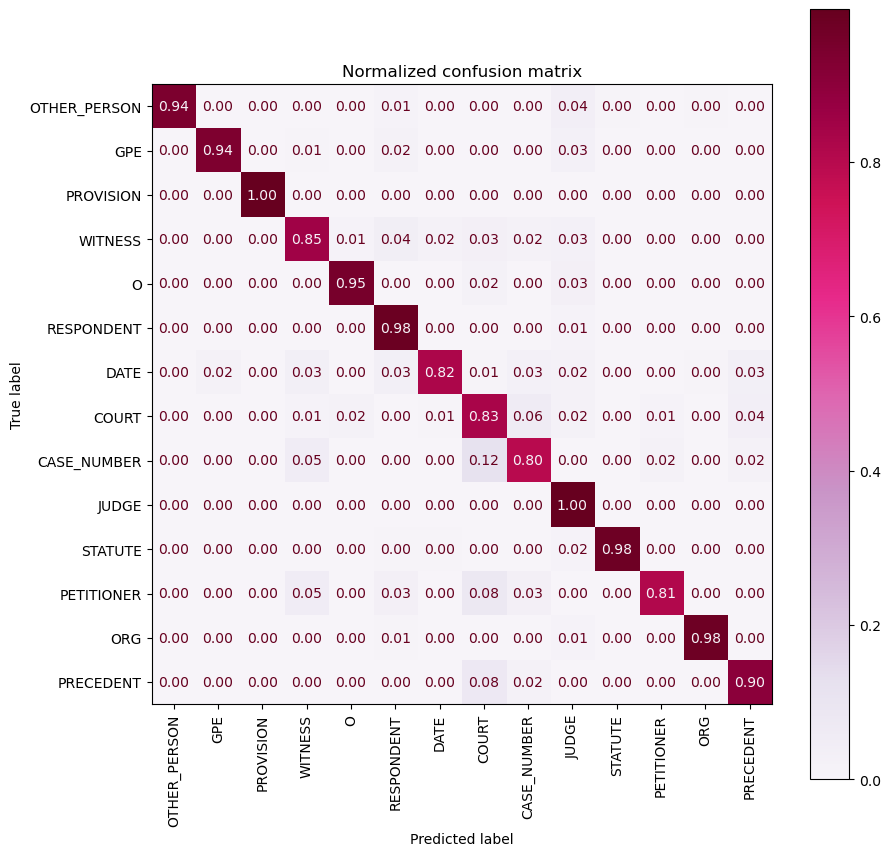

In [91]:
plot_confusion_matrix(y_preds, y_test, labels)